In [2]:
import pandas as pd
import numpy as np

In [3]:
from statsmodels.tsa.ar_model import AR, ARResults


In [4]:
df = pd.read_csv('../data/uspopulation.csv', index_col='DATE', parse_dates=True)

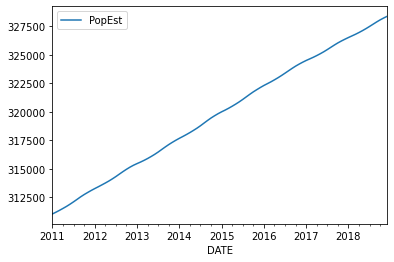

In [6]:
df.plot()

In [8]:
df.count()

PopEst    96
dtype: int64

In [9]:
len(df)

96

In [14]:
train = df.iloc[: len(df) - 12]

In [15]:
len(train)

84

In [16]:
test = df.iloc[ len(df) - 12 :]

In [17]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [46]:
model = AR(train['PopEst'])

In [47]:
AR1fit = model.fit(maxlag=1)

In [48]:
AR1fit.aic

6.410771237032229

In [49]:
AR1fit.k_ar

1

In [50]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [51]:
start = len(train)

In [52]:
end = len(train) + len(test) - 1

In [53]:
start

84

In [54]:
end

95

In [55]:
AR1fit.predict(start=start, end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [56]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [57]:
predections1 = AR1fit.predict(start=start, end=end)

In [58]:
predections1 = predections1.rename('AR(1) Predections')

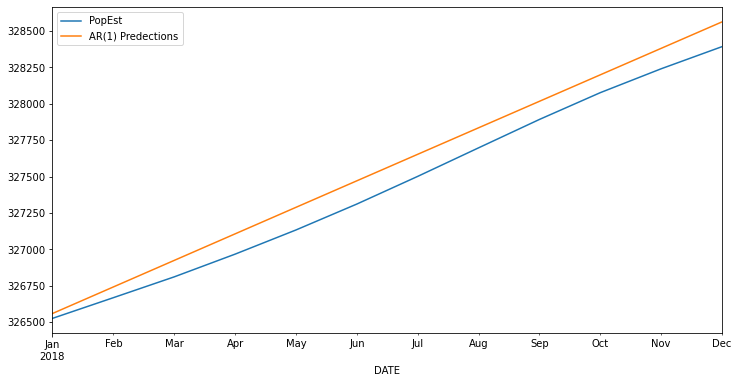

In [59]:
test.plot(figsize=(12, 6))
predections1.plot(figsize=(12, 6), legend=True)

In [64]:
model2 = AR(train['PopEst'])

C:\Users\shaki\Anaconda3\envs\Forecasting\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, F

In [65]:
AR2fit = model2.fit(maxlag=2)

In [66]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [67]:
predictions2 = AR2fit.predict(start, end)

In [68]:
predictions2

2018-01-01    326535.672503
2018-02-01    326694.718510
2018-03-01    326854.882250
2018-04-01    327015.944948
2018-05-01    327177.719499
2018-06-01    327340.045896
2018-07-01    327502.787330
2018-08-01    327665.826846
2018-09-01    327829.064479
2018-10-01    327992.414808
2018-11-01    328155.804858
2018-12-01    328319.172306
Freq: MS, dtype: float64

In [69]:
predictions2 = predictions2.rename('AR (2) predictions')

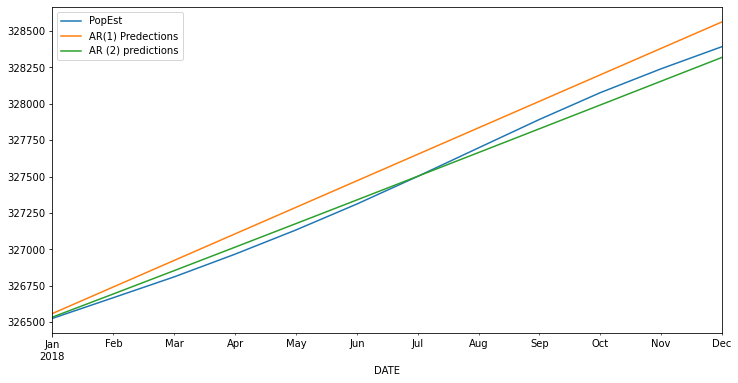

In [71]:
test.plot(figsize=(12, 6))
predections1.plot(figsize=(12, 6), legend=True)
predictions2.plot(figsize=(12, 6), legend=True)

In [72]:
ARfit = model.fit(ic='t_stat')

RuntimeError: 
Model has been fit using maxlag=1, method=cmle, ic=None, trend=c. These
cannot be changed in subsequent calls to `fit`. Instead, use a new instance of
AR.


In [79]:
model = AR(train['PopEst'])

In [80]:
ARfit = model.fit(ic='t-stat')

In [81]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [82]:
predictions8 = ARfit.predict(start, end)

In [83]:
predictions8

2018-01-01    326523.865569
2018-02-01    326662.772603
2018-03-01    326805.746942
2018-04-01    326960.064322
2018-05-01    327130.573081
2018-06-01    327315.962976
2018-07-01    327511.010339
2018-08-01    327710.938642
2018-09-01    327907.425861
2018-10-01    328092.871126
2018-11-01    328264.134053
2018-12-01    328421.667639
Freq: MS, dtype: float64

In [84]:
predictions8 = predictions8.rename('predict AR(8) ')

In [85]:
from sklearn.metrics import mean_squared_error

In [86]:
labels = ['AR1', 'AR2', 'AR8']

In [87]:
preds = [predections1, predictions2, predictions8]

In [89]:
for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'Labels {labels[i]} : {error}')

Labels AR1 : 17449.71423587912
Labels AR2 : 2713.258667805521
Labels AR8 : 186.9783771797175


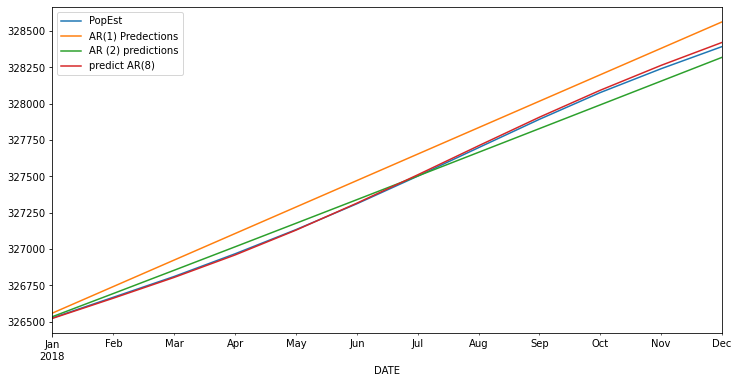

In [90]:
test.plot(figsize=(12, 6))
predections1.plot(figsize=(12, 6), legend=True)
predictions2.plot(figsize=(12, 6), legend=True)
predictions8.plot(figsize=(12, 6), legend=True)

# Forcasting

In [94]:
model = AR(df['PopEst'])

C:\Users\shaki\Anaconda3\envs\Forecasting\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, F

In [95]:
Forcastfit = model.fit()

In [102]:
forecast = Forcastfit.predict(start=len(df), end=len(df)+24).rename('Forecast')

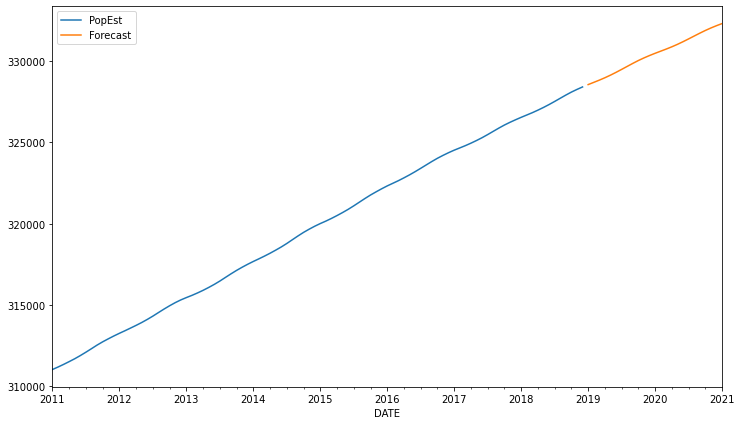

In [103]:
df.plot(figsize=(12, 7))
forecast.plot(legend=True)

In [104]:
forecast

2019-01-01    328537.420473
2019-02-01    328673.215523
2019-03-01    328810.443284
2019-04-01    328957.593034
2019-05-01    329117.336046
2019-06-01    329289.277408
2019-07-01    329470.144474
2019-08-01    329655.073868
2019-09-01    329839.483306
2019-10-01    330015.435317
2019-11-01    330175.676392
2019-12-01    330322.580631
2020-01-01    330459.617857
2020-02-01    330589.981044
2020-03-01    330720.645247
2020-04-01    330858.631644
2020-05-01    331008.625839
2020-06-01    331171.296274
2020-07-01    331343.207401
2020-08-01    331519.079846
2020-09-01    331693.967750
2020-10-01    331861.249468
2020-11-01    332015.235491
2020-12-01    332155.794361
2021-01-01    332285.712390
Freq: MS, Name: Forecast, dtype: float64

In [108]:
bd_pop = pd.read_csv('../data/bd/data-resource_2016_10_24_bangladesh-population-growth-ratio.csv', 
                     index_col='Year' ,
                     parse_dates=True)

In [109]:
bd_pop.head()

,Population,Male,Female
Year,,,
1971-01-01,65733076,34058589,31674487
1972-01-01,66997968,34713973,32283995
1973-01-01,68118479,35294549,32823930
1974-01-01,69248216,35879905,33368311
1975-01-01,70542557,36550548,33992009


In [110]:
bd_pop.index

DatetimeIndex(['1971-01-01', '1972-01-01', '1973-01-01', '1974-01-01',
               '1975-01-01', '1976-01-01', '1977-01-01', '1978-01-01',
               '1979-01-01', '1980-01-01', '1981-01-01', '1982-01-01',
               '1983-01-01', '1984-01-01', '1985-01-01', '1986-01-01',
               '1987-01-01', '1988-01-01', '1989-01-01', '1990-01-01',
               '1991-01-01', '1992-01-01', '1993-01-01', '1994-01-01',
               '1995-01-01', '1996-01-01', '1997-01-01', '1998-01-01',
               '1999-01-01', '2000-01-01', '2001-01-01', '2002-01-01',
               '2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01',
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

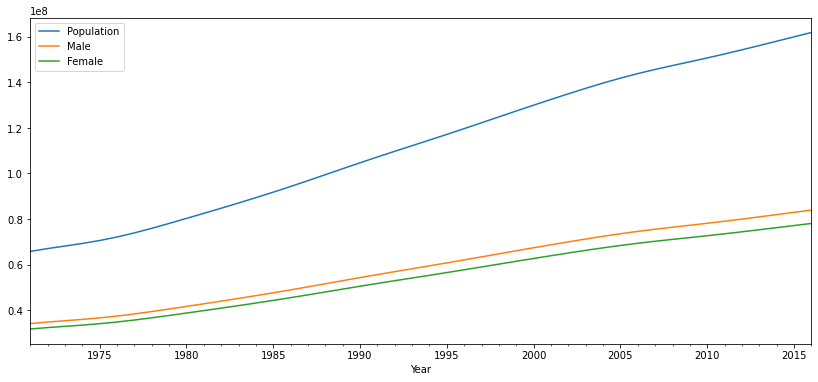

In [114]:
bd_pop.plot(figsize=(14, 6))

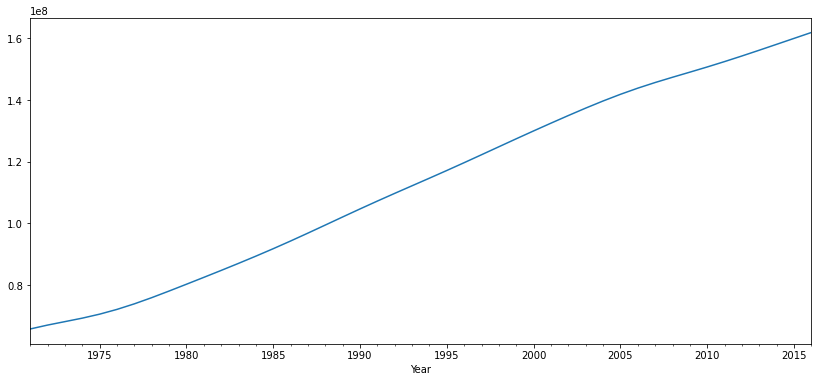

In [115]:
bd_pop['Population'].plot(figsize=(14, 6))

In [118]:
bd_model = AR(bd_pop['Population'])

C:\Users\shaki\Anaconda3\envs\Forecasting\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, F

In [119]:
bd_fit = bd_model.fit()

In [122]:
bd_preds = bd_fit.predict(start=len(bd_pop['Population']), end=len(bd_pop['Population']) + 24).rename('bd Preds')

In [121]:
bd_preds

2017-01-01    1.638905e+08
2018-01-01    1.658415e+08
2019-01-01    1.677959e+08
2020-01-01    1.697312e+08
2021-01-01    1.716183e+08
2022-01-01    1.734276e+08
2023-01-01    1.751456e+08
2024-01-01    1.767795e+08
2025-01-01    1.783454e+08
2026-01-01    1.798632e+08
2027-01-01    1.813532e+08
2028-01-01    1.828290e+08
2029-01-01    1.842960e+08
2030-01-01    1.857574e+08
2031-01-01    1.872161e+08
2032-01-01    1.886728e+08
2033-01-01    1.901268e+08
2034-01-01    1.915765e+08
2035-01-01    1.930167e+08
2036-01-01    1.944392e+08
2037-01-01    1.958361e+08
2038-01-01    1.972017e+08
2039-01-01    1.985321e+08
2040-01-01    1.998271e+08
2041-01-01    2.010900e+08
Freq: AS-JAN, dtype: float64

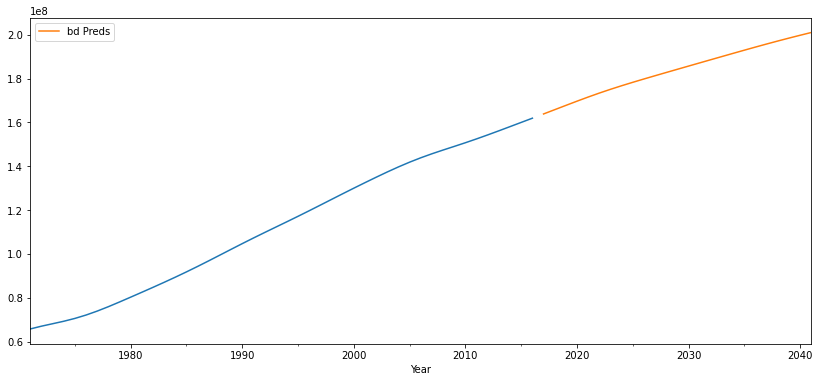

In [123]:
bd_pop['Population'].plot(figsize=(14, 6))
bd_preds.plot(legend=True)

In [124]:
# 161957017 in 2016

In [125]:
bd_preds['2020']

2020-01-01    1.697312e+08
Freq: AS-JAN, Name: bd Preds, dtype: float64